Package used

In [192]:
import pandas as pd
import statistics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

read the dataset and data summary

In [24]:
data=pd.read_csv("online_payment.csv")

In [25]:
data.drop(columns=data.columns[10], axis=1, inplace=True)
print(data.shape)

# There are 6362620 of data with 10 variable

(6362620, 10)


In [26]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


Exploratory Data analysis And Data Cleansing

Check whether there is any missing value

In [85]:
for i in range(data.shape[1]):
    print("The number of missing value in % s column is % s" % ((i+1),sum(data.iloc[:,0].isna())))

The number of missing value in 1 column is 0
The number of missing value in 2 column is 0
The number of missing value in 3 column is 0
The number of missing value in 4 column is 0
The number of missing value in 5 column is 0
The number of missing value in 6 column is 0
The number of missing value in 7 column is 0
The number of missing value in 8 column is 0
The number of missing value in 9 column is 0
The number of missing value in 10 column is 0


There are no missing value in the dataset

Check the number of unique value in each categorical variable

In [75]:
for i in list(["type", "nameOrig", "nameDest"]):
    print("the number of unique value for the % s column is % s"%(i,pd.unique(data.loc[:,i]).size))

the number of unique value for the type column is 5
the number of unique value for the nameOrig column is 6353307
the number of unique value for the nameDest column is 2722362


List the type of the payment

In [78]:
pd.unique(data.loc[:,"type"])

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

Plot the histogram of the numeric variable

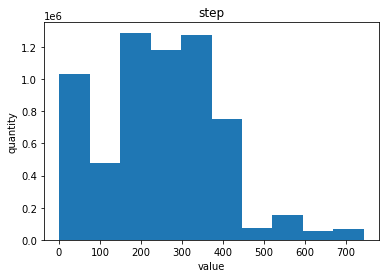

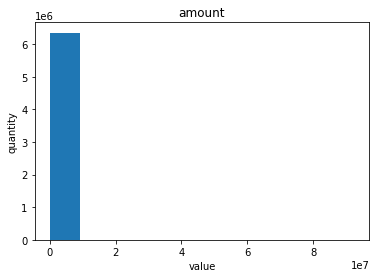

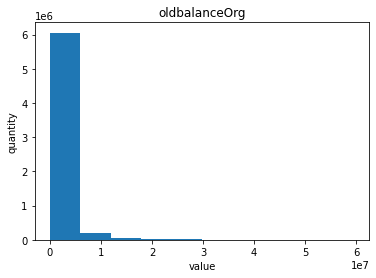

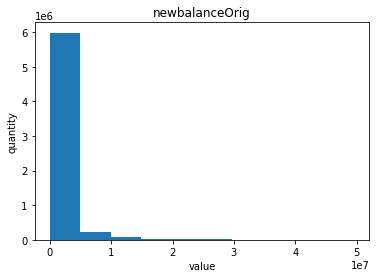

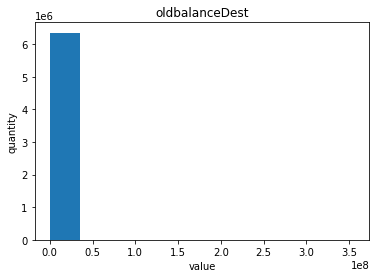

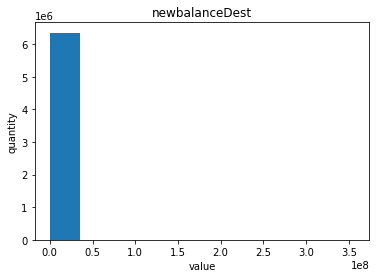

In [91]:
for i in list(["step","amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"]):
    plt.hist(data.loc[:,i])
    plt.title(i)
    plt.ylabel('quantity')
    plt.xlabel('value')
    plt.show() 
#Except the step distribution, others are right skewed

Summary Statistic of each of the numerical variable

In [100]:
for i in list(["step","amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"]):
    print(data.loc[:,i].describe())
    print()

count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: step, dtype: float64

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

count    6.362620e+06
mean     8.551137e+05
std      2.924049e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.442584e+05
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

count    6.362620e+06
mean     1.100702e+06
std      3.399180e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327057e+05
75%      9.430367e+05
max      

Training the Fraud Detection Model

Split the training data and testing data

In [122]:
X=data.iloc[:,0:9]
y=data.iloc[:,9]
#perform Label encoding for the catergorical variable
label_encoder = LabelEncoder()
for i in list(["type", "nameOrig", "nameDest"]):
    X.loc[:,i]=label_encoder.fit_transform(X.loc[:,i])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#choose 80% of the data as training data, 20% of the data as testing data

Decision Tree Model

In [201]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#fit the model

In [202]:
test_pred=clf.predict(X_test)
#test the model

In [203]:
accuracy_score(y_test, test_pred)
#the accuracy of classiflying whether the payment is fraud is about 99.97%

0.9996958799991199

In [204]:
con=confusion_matrix(y_test, test_pred)
print("     0         1")
print("0    %s  %s"%(con[0,0],con[0,1]))
print("1    %s      %s"% (con[1,0],con[1,1]))
# The confusion matrix
# 1 represent the payment is fraud while 0 represents the payment is not fraud


# Since the fraud payment is an extreme incident, 
# analyzing the result in accuracy is not a good choice

# In the fraud case, the model can detect 1404 cases in total 1620 fraud cases
# The true positive rate is 1405/1620= 86.7%

     0         1
0    1270733  171
1    216      1404


Random Forest Model

In [187]:
clf_2 = RandomForestClassifier(n_estimators=5, random_state=0)
clf_2.fit(X_train, y_train)
test_pred=clf_2.predict(X_test)

#fit the model with training data

In [188]:
accuracy_score(y_test, test_pred)

0.9997092392756443

In [189]:
con=confusion_matrix(y_test, test_pred)
print("     0         1")
print("0    %s  %s"%(con[0,0],con[0,1]))
print("1    %s      %s"% (con[1,0],con[1,1]))
# The confusion matrix
# 1 represent the payment is fraud while 0 represents the payment is not fraud


#Since the fraud payment is an extreme incident, 
# analyzing the result in accuracy is not a good choice

# In the fraud case, the model can detect 1294 cases in total 1620 fraud cases
# The false negative rate is 1294/1620= 79.87%

     0         1
0    1270860  44
1    326      1294


Logistic regression

In [193]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression()

In [195]:
test_pred=model.predict(X_test)

In [196]:
accuracy_score(y_test, test_pred)

0.999120645268773

In [197]:
con=confusion_matrix(y_test, test_pred)
print("     0         1")
print("0    %s  %s"%(con[0,0],con[0,1]))
print("1    %s      %s"% (con[1,0],con[1,1]))

# The confusion matrix
# 1 represent the payment is fraud while 0 represents the payment is not fraud

#Since the fraud payment is an extreme incident, 
#analyzing the result in accuracy is not a good choice

# In the fraud case, the model can detect 696 cases in total 1620 fraud cases
# The true positive rate is 696/1620= 42.96%

     0         1
0    1270709  195
1    924      696


Conclusion:
Three models perform similar in terms of the accuracy. 

However, in terms of true positive rate., decision tree model performs the best among the three models.

Choosing decision tree as the fraud online payment detection model is the best choice.